# **Trabajo práctico número 2**

In [442]:
import numpy as np
import pandas as pd
import geopandas as gpd
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import networkx as nx

## Seed

In [443]:
DEFAULT_SEED = 777 # Seed default; 777 por el jackpot. Somos ludópatas.
np.random.seed(DEFAULT_SEED)

## Código traído del trabajo práctico número 1

In [444]:
def elim_gaussiana(A):
  """
  Realiza la eliminación gaussiana para triangularizar la matriz A.
  Devuelve la matriz L (triangular inferior) y U (triangular superior) resultantes.
  También devuelve la cantidad de operaciones realizadas.
  """
  cant_op = 0
  m=A.shape[0]
  n=A.shape[1]
  Ac = np.copy(A)

  if m!=n:
    print('Matriz no cuadrada')
    return

  for k in range(m-1): # para el k-ésimo paso
    for i in range(k+1, n): # para cada fila
      coeficiente = Ac[i,k] / Ac[k,k]
      cant_op += 1

      for j in range(m): # para cada columna

        if k < j:
          Ac[i,j] -= coeficiente * Ac[k,j] # triangularización
          cant_op += 2

        if k == j: Ac[i,j] = coeficiente # guardamos el coeficiente

    #print("La matriz A^(" + str(k + 1) + ") es:\n", Ac)

  #print("Matriz final con L en donde van los ceros:\n", A)
  L = np.tril(Ac,-1) + np.eye(A.shape[0])
  U = np.triu(Ac)

  return L, U, cant_op

def calculaLU(matriz):
    """
    Función para calcular la descomposición LU de una matriz cuadrada.
    matriz: Matriz cuadrada a descomponer
    Retorna: L, U.
    """
    L, U, _ = elim_gaussiana(matriz)
    return L, U

## Ejercicio 1
### a.
Tenemos $L$ la matriz del Laplaciano, definida como $L = K - A$, donde $K$ es la matriz diagonal de grados y $A$ es la matriz de adyacencia.  
En particular, $A$ es una matriz simétrica donde la suma de la $i$-ésima fila es el grado del nodo $i$, y tenemos que $A_{ii} = 0$  
Además, $K$ es la matriz diagonal con los grados de los nodos en la diagonal, por lo que en $K_{ii}$ hay un $d_i$, donde $d_i$ es el grado del nodo $i$.

Luego, $L$ tiene en la $i$-ésima fila y columna un $d_i$ en la diagonal y $-1$ en las posiciones donde hay una conexión entre el nodo $i$ y otro nodo.  
Por lo tanto, al multiplicar a $L$ por $\textbf{1}$ nos queda que la $F_i(L \textbf{1}) = d_i - \sum_{j = 1}^n a_{ij} = d_i - d_i = 0$, pues, por lo mencionado anteriormente, $\sum_{j}^n a_{ij} = d_i$.

Finalmente, $L \textbf{1} = \textbf{0} = 0 \cdot \textbf{1}$, por lo que $\textbf{1}$ es autovector de $L$ asociado autovalor $\lambda_1 = 0$.

Veamos ahora la matriz R. Observando la partición en filas de la matriz $R$, notamos que:

$$
R \mathbf{1} =
\begin{pmatrix}
F_1(R \mathbf{1}) \\
\vdots \\
F_n(R \mathbf{1})
\end{pmatrix}
=
\begin{pmatrix}
F_1(R) \mathbf{1} \\
\vdots \\
F_n(R) \mathbf{1}
\end{pmatrix}
$$

Es decir, la acción de $R$ sobre el vector constante $\mathbf{1}$ se puede interpretar como el producto de cada fila $F_i(R)$ por $\mathbf{1}$. Considerando entonces la $i$-ésima fila:

$$
\begin{aligned}
F_i(R \mathbf{1}) &= F_i(R) \mathbf{1} = \sum_{j=1}^n R_{ij} \\
&= \sum_{j=1}^n (A_{ij} - P_{ij}) \quad \text{(por definición de \( R \))} \\
&= \sum_{j=1}^n A_{ij} - \sum_{j=1}^n \frac{k_i k_j}{2E} \quad \text{(por definición de \( P \))} \\
&= k_i - \frac{k_i}{2E} \sum_{j=1}^n k_j \\
&= k_i - \frac{k_i}{2E} \cdot 2E = k_i - k_i = 0
\end{aligned}
$$

$\sum_{j=1}^n k_j = 2E$, creemos que es intuitivo pero está demostrado en https://en.wikipedia.org/wiki/Handshaking_lemma#Proof, literalmente el lema de 🤝🏻, o como le decimos nostros, lema del doble saludo 🤝🏻🤝🏻.


<font color='green'>Nico:Sí, perfecto.</font>


Como esto vale para toda fila $i$, se concluye que todas las entradas del vector $R \mathbf{1}$ son cero. Por lo tanto:

$$
R \mathbf{1} = \mathbf{0}
$$

Esto implica que $\mathbf{1}$ es un autovector de $R$ asociado al autovalor $\lambda = 0$.


<font color='green'>Nico: Bien, faltaría decir a que partición de la red se corresponde el autovector</font>

### b.
Vamos a probar que si $M$ es hermitiana (o simétrica en $\mathbb{R}$), con dos autovectores $v_1$ y $v_2$ asociados a autovalores $\lambda_1$ y $\lambda_2$, entonces $v_1^* v_2 = 0$.  
Luego, como $L$ y $R$ son ambas simétricas (pues lo dice el PDF; o por construcción, A, K simétricas, P simétrica (por def. $P_{ij} = \frac{k_i k_j}{2E} = \frac{k_j k_i}{2E} = P_{ji}$)), sale de inmediato.  

Sea $M$ hermitiana, sabemos que $M$ = $M^*$. Asumamos que existen $\lambda_1 \neq \lambda_2$ autovalores de $M$ asociados a los autovectores $v_1$ y $v_2$ respectivamente.  
Luego tenemos que $M v_1 = \lambda_1 v_1$ y $M v_2 = \lambda_2 v_2$.

Queremos ver que $v_1^* v_2 = 0$. Consideramos:

$$
\begin{aligned}
v_1^* M v_2 &= v_1^* (\lambda_2 v_2) = \lambda_2 v_1^* v_2 \\
v_1^* M v_2 &= (M^* v_1)^* v_2 =_{M^* = M} (M v_1)^* v_2 = (\lambda_1 v_1)^* v_2 = \overline{\lambda_1} v_1^* v_2
\end{aligned}
$$


<font color='green'>Nico: Bien!</font>

Si además $M$ es hermitiana, sus autovalores son reales (demostrado más abajo), o sea $\overline{\lambda_1} = \lambda_1$, por lo tanto:

$$
\lambda_2 v_1^* v_2 = \lambda_1 v_1^* v_2
\Rightarrow (\lambda_2 - \lambda_1) v_1^* v_2 = 0
$$

Pero como $\lambda_1 \neq \lambda_2$, esto implica necesariamente que:

$$
v_1^* v_2 = 0
$$

Por lo tanto, $v_1$ y $v_2$ son ortogonales.  

**Por completitud**, demostración de que una matriz hermitiana tiene autovalores reales.  
Sea $\lambda \in \mathbb{C}$ (recordar que $\mathbb{R} \subsetneq \mathbb{C}$) un autovalor de $M$, y sea $v \neq 0$ un autovector asociado, es decir:

$$
M v = \lambda v
$$

Tomamos el producto interno $v^* M v$. Por un lado, usando la ecuación del autovector:

$$
v^* M v = v^* (\lambda v) = \lambda v^* v
\tag{1}
$$

Por otro lado, como $M$ es hermitiana, $M = M^*$, y el producto $v^* M v$ es un **número real**, porque:

$$
(v^* M v)^* = v^* (v^* M)^* = v^* M^* {v^*}^* = v^* M^* v = v^* M v
\Rightarrow v^* M v \in \mathbb{R}
\tag{2}
$$

Es decir, el conjugado de $v^* M v$ es igual a sí mismo $\Rightarrow$ es real.  
Notar que $v^* M v$ $\in \mathbb{R}$, y no se trata de un vector o matriz.  

Ahora, combinando **(1)** y **(2)**:

$$
\lambda v^* v \in \mathbb{R}
$$

Pero $v^* v = ||v||^2_2 > 0$ porque $v \neq 0$.  
Entonces la única forma en que $\lambda v^* v$ sea real es que **$\lambda \in \mathbb{R}$**.

Por lo tanto, **los autovalores de una matriz hermitiana son reales**.

### c.
Sea $v$ un autovector de $L$ o $R$ (las demostraciones tienen el mismo argumento, relativizamos con $M = L$ o $M = R$, i.e. asumír $M$ metavariable reemplazable por $L$ o $R$) asociado al autovalor $\lambda \neq 0$, queremos ver que $\sum_{i=1}^n v_i = 0$.  
Sabemos que $M \textbf{1} = 0 \cdot \textbf{1}$, por el punto a.  

A su vez, por el punto b, sabemos que si agarramos dos autovectores $v$ y $w$ asociados a autovalores distintos $\lambda_1 \neq \lambda_2$, entonces $v^* w = 0$.  
Luego, como $v$ es un autovector asociado a $\lambda \neq 0$, entonces $v^* \textbf{1} = \sum_{i=1}^n v_i = 0$.

Tomamos vector adjunto (aka. transpuesto-conjugado) por generalidad.

<font color='green'>Nico: Bien!</font>

## Ejercicio 2

### a.
Veamos que los autovalores de $M + \mu I$ son $\gamma_i = \lambda_i + \mu$, y que el autovector asociado a $\gamma_i$ es $v_i$.
Sabemos que $M v_i = \lambda_i v_i$, por lo que:
$$
(M + \mu I) v_i = M v_i + \mu I v_i = \lambda_i v_i + \mu v_i = (\lambda_i + \mu) v_i = \gamma_i v_i
$$

Por lo que tenemos que los autovalores de la matriz $M + \mu I$ son  $\mu + \lambda_i$, con el autovector asociado $v_i$ el mismo que está asociado a $\lambda_i$ en M..

Asumimos $\mu + \lambda_i \neq 0$ para todo $i$ (hipótesis), queremos ver que $M + \mu I$ es inversible.

Por definición, $M + \mu I$ no es inversible $\Longleftrightarrow$ existe un vector $v \neq 0$ tal que $(M + \mu I)v = 0$.

Supongamos que $M + \mu I$ no es inversible, luego existe un vector $v$ tal que  $ (M + \mu I)\cdot v = 0 \cdot v = 0$.  
Pero por hipótesis, $0$ no es autovalor de $M + \mu I$, ¡absurdo!  
Conclusión, $M + \mu I$ es inversible.

<font color='green'>Nico: Bien!</font>
### b.
Sabemos que $L$ semidefinida positiva, y, por lo tanto, todos sus autovalores son $\geq 0$ (todo esto por el PDF).

También sabemos que $L$ es simétrica (PDF), por lo que tiene autovalores reales, y por el teorema espectral sabemos que es diagonalizable con autovectores ortogonales (i.e. forman una base ortogonal).

  

Sea $\gamma_i = \lambda_i + \mu$ el autovalor de $L + \mu I$ asociado al autovector $v_i$, donde $\lambda_i$ es el autovalor de $L$ asociado a $v_i$ y $\mu > 0$ por hipótesis.

Vale que $\gamma_i = \lambda_i + \mu > \lambda_i + 0 = \lambda_i$ pues $\mu > 0$. Es decir, $\gamma_i > \lambda_i \geq 0$.

Luego, $\gamma_i > 0$ (en particular $\neq 0$) para todo $i$, por lo que $L + \mu I$ es inversible (ejercicio 2a).

  

También, si $M$ es inversible y $v$ es autovector de $M$ asociado al autovalor $\lambda$, entonces $M v = \lambda v \Longleftrightarrow v = \lambda M^{-1} v \Longleftrightarrow M^{-1} v = \frac{1}{\lambda} v$.

Por lo que $M^{-1}$ tiene como autovectores los mismos que $M$, y sus autovalores asociados son $\frac{1}{\lambda_i}$, donde $\lambda_i$ es el autovalor asociado a $v_i$ en $M$.

Entonces, los autovalores de $(L + \mu I)^{-1}$ son $\frac{1}{\gamma_i} = \frac{1}{\lambda_i + \mu}$, y sus autovectores asociados son los mismos que los de $L + \mu I$, es decir, $v_i$.

Luego, tenemos que el autovalor dominante de $(L + \mu I)^{-1}$ debe ser $\frac{1}{\gamma_{0}} = \frac{1}{\lambda_{0}+\mu} = \frac{1}{0 + \mu} = \frac{1}{\mu}$.
Esto se debe a que $\gamma_{0}$ es el autovalor más chico en módulo de $L + \mu I$, pues por el punto  1.a sabemos que $\lambda_{0} = 0$ es autovalor de $L$, y entonces debe ser el más chico pues $L$ es semidefinida positiva y por lo tanto $\gamma_{0}$ va a ser también el autovalor más chico de $L + \mu I$.

Teniendo esto en cuenta, si asumimos que $\frac{1}{\gamma_{0}}$ tiene multiplicidad $1$ como dice el enunciado, tenemos que el método de la potencia va a converger a la dirección de su autovector dominante, es decir, aquel asociado con $\frac{1}{\gamma_{0}}$, que sabemos  por lo planteado anteriormente va a ser el mismo autovector asociado a $\gamma_{0}$ de $L + \mu I$. Además, tenemos que por el ejercicio 2.a que el autovector asociado a $\gamma_{0} = \lambda_{0} + \mu$ es justamente aquel asociado a $\lambda_{0}$ en $L$, que por el ej 1.a sabemos que es el vector $\mathbf{1}$

Si tuviéramos que la multiplicidad de $\gamma_{0}$ es distinta de $1$, entonces como visto en la clase tendríamos que el método convergería a un vector del autoespacio del autovalor dominante.

<font color='green'>Nico: Impecable</font>

### c.
Como $M$ es simétrica, tenemos por el teorema espectral que admite una base ortogonal de autovectores, por lo que, para $i, j$ distintos entre sí y $v_{i},v_{j}$ autovectores de $M$, se cumple que $v_{i}^{t}v_{j} = 0$.

<font color='green'>Nico: Ok, aunque no hace falta usar el resultado del teorema espectral,  alcanza con usar lo que se demostro previamente en el ejercicio 1 </font>

Luego, sea $i$ autovector de $M$ con $i \neq 1$, y $\bar{M} = M - \lambda_{1}\frac{v_{1}v_{1}^{t}}{v_{1}^{t}v_{1}}$, vemos que: $$\begin{align}
\bar{M}v_{i} &= (M - \lambda_{1}\frac{v_{1}v_{1}^{t}}{v_{1}^{t}v_{1}})v_{i}  \\
&= Mv_{i} - \lambda_{1}\frac{v_{1}v_{1}^{t}}{v_{1}^{t}v_{1}} v_{i} \\
&= Mv_{i} - \lambda_{1}\frac{v_{1}}{v_{1}^{t}v_{1}}v_{1}^{t}v_{i} \\
&= M v_{i} - \lambda_{1}\frac{v_{1}}{v_{1}^{t}v_{1}}\cdot 0  \\
&= Mv_{i}
\end{align}$$

Llegamos a que  $\bar{M}v_{i} = Mv_{i} = \lambda_{i}v_{i}$, por lo que $\bar{M}$ tiene los mismos autovectores que M, y mismos autovalores asociados, para $i \neq 1$.

Veamos entonces que pasa con $v_{1}$:

$$\begin{align}
 \\
\bar{M}v_{1} &= (M - \lambda_{1}\frac{v_{1}v_{1}^{t}}{v_{1}^{t}v_{1}})v_{1}  \\  \\

&= Mv_{1} - \lambda_{1}\frac{v_{1}v_{1}^{t}}{v_{1}^{t}v_{1}}v_{1}  \\ \\

&= Mv_{1} - \lambda_{1}v_{1}\frac{v_{1}^{t}v_{1}}{v_{1}^{t}v_{1}}   \\ \\

(v_{1}
 \text{ autovalor de M})&=\lambda_{1}v_{1} - \lambda_{1}v_{1} = 0
\end{align}
$$
Luego, tenemos que $\bar{M}v_{1} = 0\cdot v_{1}$, por lo que $v_{1}$ es autovector de $\bar{M}$ con autovalor asociado 0.

<font color='green'>Nico: Bien!</font>

## Ejercicio 3
a.  

In [445]:
def calcula_K(A):
  K = np.zeros(A.shape) # Inicializamos Kinv con ceros
  for i in range(A.shape[0]): # Recorremos las filas de A
    suma = np.sum(A[i,:]) # Suma de la fila i-ésima de A
    K[i,i] = suma # Asignamos la suma a la diagonal de K
  return K

def calcula_L(A):
  return calcula_K(A) - A

def calcula_P(A):
  K = calcula_K(A) # Calculamos la matriz de grado K
  doubleE = np.sum(K) # Cantidad de aristas por dos
  P = np.zeros(A.shape) # Inicializamos P con ceros
  for i in range(A.shape[0]): # Recorremos las filas de A
    for j in range(A.shape[1]): # Recorremos las columnas de A
      if doubleE != 0: # Si la cantidad de aristas por dos no es cero, asignamos el valor correspondiente
        P[i,j] = (K[i,i] * K[j,j]) / (2 * doubleE) # Calculamos el valor de P_ij
  return P

def calcula_R(A):
  return A - calcula_P(A)

def signo(v_i):
  return -1 if v_i < 0 else 1  # Retorna -1 si el elemento es negativo, 1 si es positivo o cero

def calcula_s(v):
  s = np.zeros(v.shape) # Inicializamos s con ceros
  for i in range(len(v)): # Recorremos el vector v
    s[i] = signo(v[i]) # Asignamos el signo correspondiente a cada elemento de v
  return s

def calcula_lambda(L, v):
  s = calcula_s(v)  # Calculamos el vector s a partir de v
  return (1/4) * s.transpose() @ L @ s  # Calculamos Lambda

def calcula_Q(R, v):
  s = calcula_s(v)  # Calculamos el vector s a partir de v
  return s.transpose() @ R @ s  # Calculamos Q

A_ejemplo = np.array([
   [0, 1, 1, 1, 0, 0, 0, 0],
   [1, 0, 1, 1, 0, 0, 0, 0],
   [1, 1, 0, 1, 0, 1, 0, 0],
   [1, 1, 1, 0, 1, 0, 0, 0],
   [0, 0, 0, 1, 0, 1, 1, 1],
   [0, 0, 1, 0, 1, 0, 1, 1],
   [0, 0, 0, 0, 1, 1, 0, 1],
   [0, 0, 0, 0, 1, 1, 1, 0]
])

L_ejemplo = calcula_L(A_ejemplo)
R_ejemplo = calcula_R(A_ejemplo)

v_ejemplo = np.array([1, 1, 1, 1, -1, -1, -1, -1])

corte_Lambda_ejemplo = calcula_lambda(L_ejemplo, v_ejemplo)
modularidad_Q_ejemplo = calcula_Q(R_ejemplo, v_ejemplo)

print("Matriz de adyacencia A:")
print(A_ejemplo)
print("Matriz de Laplaciano L:")
print(L_ejemplo)
print("Matriz de modularidad R:")
print(R_ejemplo)
print("Vector de corte v:")
print(v_ejemplo)
print("Corte Lambda:")
print(corte_Lambda_ejemplo)
print("Modularidad Q:")
print(modularidad_Q_ejemplo)


Matriz de adyacencia A:
[[0 1 1 1 0 0 0 0]
 [1 0 1 1 0 0 0 0]
 [1 1 0 1 0 1 0 0]
 [1 1 1 0 1 0 0 0]
 [0 0 0 1 0 1 1 1]
 [0 0 1 0 1 0 1 1]
 [0 0 0 0 1 1 0 1]
 [0 0 0 0 1 1 1 0]]
Matriz de Laplaciano L:
[[ 3. -1. -1. -1.  0.  0.  0.  0.]
 [-1.  3. -1. -1.  0.  0.  0.  0.]
 [-1. -1.  4. -1.  0. -1.  0.  0.]
 [-1. -1. -1.  4. -1.  0.  0.  0.]
 [ 0.  0.  0. -1.  4. -1. -1. -1.]
 [ 0.  0. -1.  0. -1.  4. -1. -1.]
 [ 0.  0.  0.  0. -1. -1.  3. -1.]
 [ 0.  0.  0.  0. -1. -1. -1.  3.]]
Matriz de modularidad R:
[[-0.16071429  0.83928571  0.78571429  0.78571429 -0.21428571 -0.21428571
  -0.16071429 -0.16071429]
 [ 0.83928571 -0.16071429  0.78571429  0.78571429 -0.21428571 -0.21428571
  -0.16071429 -0.16071429]
 [ 0.78571429  0.78571429 -0.28571429  0.71428571 -0.28571429  0.71428571
  -0.21428571 -0.21428571]
 [ 0.78571429  0.78571429  0.71428571 -0.28571429  0.71428571 -0.28571429
  -0.21428571 -0.21428571]
 [-0.21428571 -0.21428571 -0.28571429  0.71428571 -0.28571429  0.71428571
   0.78571429  

<font color='green'>Nico: Bien!</font>

b.

In [446]:
def metpot1(A, tol=1e-8, maxrep=np.inf):
  # Recibe una matriz A y calcula su autovalor de mayor módulo, con un error relativo menor a tol y-o haciendo como mucho maxrep repeticiones
  v = np.random.rand(A.shape[0]) * 2 - 1 # Generamos un vector de partida aleatorio, entre -1 y 1
  v = v / np.linalg.norm(v) # Lo normalizamos
  v1 = A @ v # Aplicamos la matriz una vez
  v1 = v1 / np.linalg.norm(v1) # Normalizamos
  l =  v @ A @ v # Calculamos el autovalor estimado
  l1 = v1 @ A @ v1 # Y el estimado en el siguiente paso
  nrep = 0 # Contador
  while np.abs(l1-l)/np.abs(l) > tol and nrep < maxrep: # Si estamos por debajo de la tolerancia buscada
    v = v1 # Actualizamos v y repetimos
    l = l1
    v1 = A @ v # Calculamos nuevo v1
    v1 = v1 / np.linalg.norm(v1) # Normalizamos
    l1 = v1 @ A @ v1 # Calculamos autovalor
    nrep += 1 # Un pasito mas
  if not nrep < maxrep:
    print('MaxRep alcanzado')
  l = v1 @ A @ v1 # Calculamos el autovalor
  return v1, l, nrep<maxrep

def deflaciona(A, tol=1e-8, maxrep=np.inf):
    # Recibe la matriz A, una tolerancia para el método de la potencia, y un número máximo de repeticiones
    v1, l1, _ = metpot1(A, tol, maxrep) # Buscamos primer autovector con método de la potencia
    deflA = A - l1 * np.linalg.outer(v1, v1) # Sugerencia, usar la funcion outer de numpy
    return deflA

def inversa(A):
  # Calcula la inversa de la matriz A usando LU
  L,U = calculaLU(A)
  I = np.eye(A.shape[0])
  Y = scipy.linalg.solve_triangular(L,I,lower=True) # Resuelvo el sistema LY = I con Y = UX
  A_inv = scipy.linalg.solve_triangular(U,Y) # Resuelvo el sistema UA_inv = Y
  return A_inv

def metpotI(A, mu, tol=1e-8, maxrep=np.inf):
    # Retorna el primer autovalor de la inversa de A + mu * I, junto a su autovector y si el método convergió.
    M = A + mu * np.eye(A.shape[0])
    M_inv = inversa(M) # Calculamos la inversa de M
    return metpot1(M_inv, tol, maxrep)

def metpot2(A, v1, l1, tol=1e-8, maxrep=np.inf):
  # La funcion aplica el metodo de la potencia para buscar el segundo autovalor de A, suponiendo que sus autovectores son ortogonales
  # v1 y l1 son los primeors autovectores y autovalores de A
  # Have fun!
  deflA = A - l1 * np.linalg.outer(v1, v1) # Deflacionamos la matriz A
  return metpot1(deflA, tol, maxrep)

def metpotI2(A, mu, tol=1e-8, maxrep=np.inf):
   # Recibe la matriz A, y un valor mu y retorna el segundo autovalor y autovector de la matriz A,
   # suponiendo que sus autovalores son positivos excepto por el menor que es igual a 0
   # Retorna el segundo autovector, su autovalor, y si el metodo llegó a converger.
   X = A + mu * np.eye(A.shape[0]) # Calculamos la matriz A shifteada en mu
   iX = inversa(X) # La invertimos
   defliX = deflaciona(iX, tol, maxrep) # La deflacionamos
   v,l,_ =  metpot1(defliX, tol, maxrep) # Buscamos su segundo autovector y autovalor
   l = 1/l # Reobtenemos el autovalor correcto
   l -= mu
   return v,l,_

Nos piden ahora:
- a) Calcular el autovector asociado al segundo autovalor más chico de la matriz L
- b) Calcular el autovector asociado al autovalor más grande de R
- c) Calcular los vectores s asociados
### Primero calculamos L y R usando la matriz de ejemplo:

In [447]:
mu = 1

# Para poder calcular el autovector asociado al segundo autovalor más chico asociado a L
v_l, lambda_l, _ = metpotI2(L_ejemplo, mu)
print("L tiene segundo autovalor más chico", lambda_l, "con autovector", v_l)

# El cálculo para el autovalor más grande de R es más directo, y es simplemente llamar a metpot1
v_r, lambda_r,_ = metpot1(R_ejemplo)
print("R tiene autovalor más grande", lambda_r, "con autovector", v_r)

# Hacemos un map a todos los elementos de v_l y v_r para obtener sus signos, y usamos unos casteos místicos
s_l = np.array(list(map(signo, v_l))) # Aplicamos la función signo a cada elemento de v_l
s_r = np.array(list(map(signo, v_r))) # Aplicamos la función signo a cada elemento de v_r

# Para poder entonces obtener las particiones del grafo del ejemplo, miramos los signos
print("Las particiones del ejemplo dadas por el Laplaciano están dadas por el vector", s_l)
print("Las particiones del método de modularidad están dadas por el vector", s_r)

L tiene segundo autovalor más chico 0.7639320150849185 con autovector [-0.42536425 -0.42534179 -0.26291846 -0.26291176  0.26282039  0.26281315
  0.42530816  0.42528644]
R tiene autovalor más grande 2.561552783409101 con autovector [ 0.39409254  0.39409254  0.30773319  0.30765403 -0.30767917 -0.30775833
 -0.39411277 -0.39411277]
Las particiones del ejemplo dadas por el Laplaciano están dadas por el vector [-1 -1 -1 -1  1  1  1  1]
Las particiones del método de modularidad están dadas por el vector [ 1  1  1  1 -1 -1 -1 -1]


c.  

In [448]:
def laplaciano_iterativo(A,niveles,nombres_s=None):
    # Recibe una matriz A, una cantidad de niveles sobre los que hacer cortes, y los nombres de los nodos
    # Retorna una lista con conjuntos de nodos representando las comunidades.
    # La función debe, recursivamente, ir realizando cortes y reduciendo en 1 el número de niveles hasta llegar a 0 y retornar.
    if nombres_s is None: # Si no se proveyeron nombres, los asignamos poniendo del 0 al N-1
        nombres_s = range(A.shape[0])
    if A.shape[0] == 1 or niveles == 0: # Si llegamos al último paso, retornamos los nombres en una lista
        return([nombres_s])
    else: # Sino:
        L = calcula_L(A) # Recalculamos el L
        v,_,_ = metpotI2(L, mu) # Encontramos el segundo autovector de L
        # Recortamos A en dos partes, la que está asociada a el signo positivo de v y la que está asociada al negativo
        Ap = A[:,v>0][v>0,:] # Asociado al signo positivo
        Am = A[:,v<0][v<0,:] # Asociado al signo negativo

        return(
                laplaciano_iterativo(Ap,niveles-1,
                                     nombres_s=[ni for ni,vi in zip(nombres_s,v) if vi>0]) +
                laplaciano_iterativo(Am,niveles-1,
                                     nombres_s=[ni for ni,vi in zip(nombres_s,v) if vi<0])
                )

In [449]:
def modularidad_iterativo(A=None,R=None,nombres_s=None):
    # Recibe una matriz A, una matriz R de modularidad, y los nombres de los nodos
    # Retorna una lista con conjuntos de nodos representando las comunidades.

    if A is None and R is None:
        print('Dame una matriz')
        return(np.nan)
    if R is None:
        R = calcula_R(A)
    if nombres_s is None:
        nombres_s = range(R.shape[0])
    # Acá empieza lo bueno
    if R.shape[0] == 1: # Si llegamos al último nivel
        return([[nombres_s[0]]]) # Retornamos el único nodo en una lista
    else:
        v,_,_ = metpot1(R) # Primer autovector y autovalor de R
        # Modularidad Actual:
        Q0 = np.sum(R[v>0,:][:,v>0]) + np.sum(R[v<0,:][:,v<0])
        if Q0<=0 or all(v>0) or all(v<0): # Si la modularidad actual es menor a cero, o no se propone una partición, terminamos
            return([[ni for ni,vi in zip(nombres_s,v) if vi>0],[ni for ni,vi in zip(nombres_s,v) if vi<0]]) # Retornamos la partición actual
        else:
            ## Hacemos como con L, pero usando directamente R para poder mantener siempre la misma matriz de modularidad
            Rp = R[v>0,:][:,v>0] # Parte asociada a los valores positivos de v
            Rm = R[v<0,:][:,v<0] # Parte asociada a los valores negativos de v
            vp,_,_ = metpot1(Rp) # Autovector principal de Rp
            vm,_,_ = metpot1(Rm) # Autovector principal de Rm

            # Calculamos el cambio en Q que se produciría al hacer esta partición
            Q1 = 0
            if not all(vp>0) or all(vp<0):
               Q1 = np.sum(Rp[vp>0,:][:,vp>0]) + np.sum(Rp[vp<0,:][:,vp<0])
            if not all(vm>0) or all(vm<0):
                Q1 += np.sum(Rm[vm>0,:][:,vm>0]) + np.sum(Rm[vm<0,:][:,vm<0])
            if Q0 >= Q1: # Si al partir obtuvimos un Q menor, devolvemos la última partición que hicimos
                return([[ni for ni,vi in zip(nombres_s,v) if vi>0],[ni for ni,vi in zip(nombres_s,v) if vi<0]])
            else:
                # Sino, repetimos para los subniveles
                return(
                    modularidad_iterativo(A,Rp,[ni for ni,vi in zip(nombres_s,v) if vi>0]) +
                    modularidad_iterativo(A,Rm,[ni for ni,vi in zip(nombres_s,v) if vi<0])
                )

In [450]:
def el_segundo_autovalor_más_chico_en_módulo_tiene_multiplicidad_mayor_a_uno(A):
    eigvals = np.linalg.eigvals(A)
    eigvals.sort()
    rel_tol = 1e-2
    smallest = eigvals[0]
    filtered = eigvals[np.abs(eigvals - smallest) > rel_tol * max(1, abs(smallest))]
    second_smallest = filtered[0] if filtered.size > 0 else None
    return second_smallest is not None and np.count_nonzero(np.isclose(eigvals, second_smallest, atol=1e-4, rtol=1e-2)) > 1

In [451]:
def laplaciano_iterativo_multiplicidad(A,niveles,nombres_s=None):
    # Recibe una matriz A, una cantidad de niveles sobre los que hacer cortes, y los nombres de los nodos
    # Retorna una lista con conjuntos de nodos representando las comunidades.
    # La función debe, recursivamente, ir realizando cortes y reduciendo en 1 el número de niveles hasta llegar a 0 y retornar.
    if el_segundo_autovalor_más_chico_en_módulo_tiene_multiplicidad_mayor_a_uno(A):
        print(f"  El segundo autovalor más chico en módulo de A tiene multiplicidad mayor a uno")
    if nombres_s is None: # Si no se proveyeron nombres, los asignamos poniendo del 0 al N-1
        nombres_s = range(A.shape[0])
    if A.shape[0] == 1 or niveles == 0: # Si llegamos al último paso, retornamos los nombres en una lista
        return([nombres_s])
    else: # Sino:
        L = calcula_L(A) # Recalculamos el L
        if el_segundo_autovalor_más_chico_en_módulo_tiene_multiplicidad_mayor_a_uno(L):
            print(f"  El segundo autovalor más chico en módulo de L tiene multiplicidad mayor a uno")
        v,_,_ = metpotI2(L, mu) # Encontramos el segundo autovector de L
        # Recortamos A en dos partes, la que está asociada a el signo positivo de v y la que está asociada al negativo
        Ap = A[:,v>0][v>0,:] # Asociado al signo positivo
        Am = A[:,v<0][v<0,:] # Asociado al signo negativo
        if el_segundo_autovalor_más_chico_en_módulo_tiene_multiplicidad_mayor_a_uno(Ap):
            print(f"  El segundo autovalor más chico en módulo de Ap tiene multiplicidad mayor a uno")
        if el_segundo_autovalor_más_chico_en_módulo_tiene_multiplicidad_mayor_a_uno(Am):
            print(f"  El segundo autovalor más chico en módulo de Am tiene multiplicidad mayor a uno")

        return(
                laplaciano_iterativo_multiplicidad(Ap,niveles-1,
                                     nombres_s=[ni for ni,vi in zip(nombres_s,v) if vi>0]) +
                laplaciano_iterativo_multiplicidad(Am,niveles-1,
                                     nombres_s=[ni for ni,vi in zip(nombres_s,v) if vi<0])
                )

In [452]:
def el_autovalor_máximo_en_módulo_tiene_multiplicidad_mayor_a_uno(A):
  eigvals = np.linalg.eigvals(A)
  max_eigval = max(eigvals, key=abs)
  multiplicity = np.count_nonzero(np.isclose(eigvals, max_eigval, atol=1e-4, rtol=1e-2))
  return multiplicity > 1

In [453]:
def modularidad_iterativo_multiplicidad(A=None,R=None,nombres_s=None):
    # Recibe una matriz A, una matriz R de modularidad, y los nombres de los nodos
    # Retorna una lista con conjuntos de nodos representando las comunidades.

    if A is None and R is None:
        print('Dame una matriz')
        return(np.nan)
    if el_autovalor_máximo_en_módulo_tiene_multiplicidad_mayor_a_uno(A):
        print(f"  El autovalor máximo en módulo de A tiene multiplicidad mayor a uno")
    if R is None:
        R = calcula_R(A)
    if el_autovalor_máximo_en_módulo_tiene_multiplicidad_mayor_a_uno(R):
        print(f"  El autovalor máximo en módulo de R tiene multiplicidad mayor a uno")
    if nombres_s is None:
        nombres_s = range(R.shape[0])
    # Acá empieza lo bueno
    if R.shape[0] == 1: # Si llegamos al último nivel
        return([[nombres_s[0]]]) # Retornamos el único nodo en una lista
    else:
        v,_,_ = metpot1(R) # Primer autovector y autovalor de R
        # Modularidad Actual:
        Q0 = np.sum(R[v>0,:][:,v>0]) + np.sum(R[v<0,:][:,v<0])
        if Q0<=0 or all(v>0) or all(v<0): # Si la modularidad actual es menor a cero, o no se propone una partición, terminamos
            return([[ni for ni,vi in zip(nombres_s,v) if vi>0],[ni for ni,vi in zip(nombres_s,v) if vi<0]]) # Retornamos la partición actual
        else:
            ## Hacemos como con L, pero usando directamente R para poder mantener siempre la misma matriz de modularidad
            Rp = R[v>0,:][:,v>0] # Parte asociada a los valores positivos de v
            Rm = R[v<0,:][:,v<0] # Parte asociada a los valores negativos de v
            if el_autovalor_máximo_en_módulo_tiene_multiplicidad_mayor_a_uno(Rp):
                print(f"  El autovalor máximo en módulo de Rp tiene multiplicidad mayor a uno")
            if el_autovalor_máximo_en_módulo_tiene_multiplicidad_mayor_a_uno(Rm):
                print(f"  El autovalor máximo en módulo de Rm tiene multiplicidad mayor a uno")
            vp,_,_ = metpot1(Rp) # Autovector principal de Rp
            vm,_,_ = metpot1(Rm) # Autovector principal de Rm

            # Calculamos el cambio en Q que se produciría al hacer esta partición
            Q1 = 0
            if not all(vp>0) or all(vp<0):
               Q1 = np.sum(Rp[vp>0,:][:,vp>0]) + np.sum(Rp[vp<0,:][:,vp<0])
            if not all(vm>0) or all(vm<0):
                Q1 += np.sum(Rm[vm>0,:][:,vm>0]) + np.sum(Rm[vm<0,:][:,vm<0])
            if Q0 >= Q1: # Si al partir obtuvimos un Q menor, devolvemos la última partición que hicimos
                return([[ni for ni,vi in zip(nombres_s,v) if vi>0],[ni for ni,vi in zip(nombres_s,v) if vi<0]])
            else:
                # Sino, repetimos para los subniveles
                return(
                    modularidad_iterativo_multiplicidad(A,Rp,[ni for ni,vi in zip(nombres_s,v) if vi>0]) +
                    modularidad_iterativo_multiplicidad(A,Rm,[ni for ni,vi in zip(nombres_s,v) if vi<0])
                )

Nos piden ahora aplicar estas funciones al grafo del ejemplo y responder las siguientes preguntas:
- Cuál es la partición óptima en 4 grupos para el método basado en el laplaciano?
- ¿Cuál es la partición óptima basada en la modularidad?

In [454]:
partición_laplaciano = laplaciano_iterativo(A_ejemplo, 2)
print("Partición óptima en 4 grupos (Laplaciano):", partición_laplaciano)

partición_modularidad = modularidad_iterativo(A_ejemplo)
print("Partición óptima basada en la modularidad:", partición_modularidad)

Partición óptima en 4 grupos (Laplaciano): [[4, 6, 7], [5], [0, 1, 2], [3]]
Partición óptima basada en la modularidad: [[0, 1, 2, 3], [4, 5, 6, 7]]


<font color='orange'>Nico: Faltaría decir algo para este caso. Justamente en este ejemplo se puede ver algo interesante respecto al comportamiento de la seed y la estabilidad en el laplaciano. Debería verse como impacta el método de la potencia en la obtención de comunidades distintas en cada realización.</font>


<a id="analisis-laplaciano"></a>
### Análisis de estabilidad del método del Laplaciano

El método del Laplaciano depende del método de la potencia para encontrar autovectores, y como éste utiliza inicialización aleatoria, diferentes seeds pueden llevar a diferentes particiones. Veamos este comportamiento:

In [455]:
print("Análisis de estabilidad del método del Laplaciano con diferentes seeds:")
for seed in range(5):
    print(f"Seed {seed}:")
    np.random.seed(seed)
    partición = laplaciano_iterativo_multiplicidad(A_ejemplo, 2)
    print(f"  Partición: {partición}")

Análisis de estabilidad del método del Laplaciano con diferentes seeds:
Seed 0:
  El segundo autovalor más chico en módulo de L tiene multiplicidad mayor a uno
  El segundo autovalor más chico en módulo de L tiene multiplicidad mayor a uno
  Partición: [[0, 1, 3], [2], [4, 7], [5, 6]]
Seed 1:
  El segundo autovalor más chico en módulo de L tiene multiplicidad mayor a uno
  El segundo autovalor más chico en módulo de L tiene multiplicidad mayor a uno
  Partición: [[0, 1], [2, 3], [5, 7], [4, 6]]
Seed 2:
  El segundo autovalor más chico en módulo de L tiene multiplicidad mayor a uno
  El segundo autovalor más chico en módulo de L tiene multiplicidad mayor a uno
  Partición: [[4, 6], [5, 7], [1, 2], [0, 3]]
Seed 3:
  El segundo autovalor más chico en módulo de L tiene multiplicidad mayor a uno
  El segundo autovalor más chico en módulo de L tiene multiplicidad mayor a uno
  Partición: [[5, 6], [4, 7], [1, 2], [0, 3]]
Seed 4:
  El segundo autovalor más chico en módulo de L tiene multiplici

Notar que con la semilla por defecto (777), el método del Laplaciano produjo una partición considerada óptima para el ejemplo analizado.

En contraste, al ejecutar el método con cinco semillas aleatorias distintas (de 0 a 4), no se obtuvo ninguna partición óptima como la obtenida con la semilla 777. Entre estas, los resultados correspondientes a las semillas 0 y 4 se aproximan más a la partición óptima, aunque siguen siendo inferiores en comparación.

Este comportamiento plantea una cuestión relevante: ¿por qué el método del Laplaciano logra alcanzar la partición óptima bajo ciertas condiciones de inicialización (seed), pero no bajo otras? La respuesta consideramos que está íntimamente relacionada con el método de la potencia, que es utilizado por el método del Laplaciano.

El método de la potencia permite aproximar autovectores asociados a autovalores dominantes de una matriz. En particular, aplicado sobre el Laplaciano (o su variante normalizada), nos interesa obtener los autovectores asociados a los menores autovalores no nulos. Cuando uno de estos autovalores posee multiplicidad mayor a uno, su espacio propio es de dimensión mayor que uno, y contiene infinitos vectores posibles, todos válidos desde el punto de vista algebraico.

El método de la potencia, al depender de una inicialización aleatoria, converge a una dirección arbitraria dentro de ese subespacio propio. Es decir, no necesariamente converge al mismo vector en cada ejecución, sino a una combinación lineal distinta de los autovectores del mismo autovalor. Como consecuencia, aunque el valor del autovalor no varía, el resultado final (en este caso, la partición derivada de los autovectores) puede variar sensiblemente.

Por lo tanto, este fenómeno evidencia que la existencia de autovalores múltiples en el espectro del Laplaciano introduce una fuente de inestabilidad en el método, haciendo que pequeñas variaciones (como la elección de una semilla aleatoria) puedan producir particiones sustancialmente distintas.

A partir de este análisis, se puede deducir que una métrica razonable para evaluar la estabilidad del método del Laplaciano es observar la distribución de tamaños de las comunidades resultantes a lo largo de múltiples ejecuciones. Si esta distribución varía considerablemente ante pequeñas perturbaciones (como cambiar la semilla), indica sensibilidad a la inicialización y posiblemente una alta multiplicidad espectral. Esta métrica puede ajustarse según el número de grupos deseados, que a su vez depende del nivel $k$ que se pasa como parámetro al método del Laplaciano.

<a id="analisis-modularidad"></a>
### Análisis de estabilidad del método de modularidad

El método de modularidad, al igual que el método del Laplaciano, utiliza el método de la potencia. Debido a esto, diferentes seeds podrían llevar a diferentes particiones. Veamos qué es lo que ocurre:

In [456]:
print("Análisis de estabilidad del método de modularidad con diferentes seeds:")
for seed in range(5):
    print(f"Seed {seed}:")
    np.random.seed(seed)
    partición = modularidad_iterativo_multiplicidad(A_ejemplo)
    print(f"  Partición: {partición}")

Análisis de estabilidad del método de modularidad con diferentes seeds:
Seed 0:
  Partición: [[4, 5, 6, 7], [0, 1, 2, 3]]
Seed 1:
  Partición: [[0, 1, 2, 3], [4, 5, 6, 7]]
Seed 2:
  Partición: [[4, 5, 6, 7], [0, 1, 2, 3]]
Seed 3:
  Partición: [[0, 1, 2, 3], [4, 5, 6, 7]]
Seed 4:
  Partición: [[0, 1, 2, 3], [4, 5, 6, 7]]


Se observa que, independientemente de la semilla utilizada, el método siempre detecta la misma cantidad de comunidades (dos) y además produce particiones esencialmente idénticas (con excepción del orden), lo que indicaría una alta estabilidad. A diferencia del método del Laplaciano, no se manifiestan grandes variaciones ni en la estructura ni en el número de comunidades encontradas.

Observamos también que la multiplicidad del los autovalores relevantes para este método nunca es mayor a 1; esto nos llevaría a creer que la estabilidad del método podría estar relacionada a la multiplicidad de los mismos (cada iteración). Sin embargo, es una red de ejemplo y 5 casos, por lo que no podemos extraer información relevante del mismo. En el punto 4 se profundizará al respecto.

In [457]:
print("Devolvemos la semilla a", DEFAULT_SEED)
np.random.seed(DEFAULT_SEED)

Devolvemos la semilla a 777


## Ejercicio 4

## Cargamos de datos de los museos

El listado de los museos, con el que se construye el [mapa](https://mapas.museosabiertos.org/museos/caba/), lo pueden encontrar [acá](https://github.com/MuseosAbiertos/Leaflet-museums-OpenStreetMap/blob/principal/data/export.geojson?short_path=bc357f3). También descargamos los barrios de CABA como complemento para los gráficos.

In [458]:
# Leemos el archivo, retenemos aquellos museos que están en CABA, y descartamos aquellos que no tienen latitud y longitud
museos = gpd.read_file('https://raw.githubusercontent.com/MuseosAbiertos/Leaflet-museums-OpenStreetMap/refs/heads/principal/data/export.geojson')
barrios = gpd.read_file('https://cdn.buenosaires.gob.ar/datosabiertos/datasets/ministerio-de-educacion/barrios/barrios.geojson')

## Calculamos de la matriz de distancias

Ahora construimos la matriz de distancias entre todos los museos. Como la tierra es un [geoide](https://es.wikipedia.org/wiki/Geoide) (es decir que no es [plana](https://es.wikipedia.org/wiki/Terraplanismo)), el cálculo de distancias no es una operación obvia. Una opción es proyectar a un [sistema de coordenadas local](https://geopandas.org/en/stable/docs/user_guide/projections.html), de forma tal que las distancias euclideas se correspondan con las distancias en metros. En este notebook usamos [EPSG](https://en.wikipedia.org/wiki/EPSG_Geodetic_Parameter_Dataset) 22184.

In [459]:
# En esta línea:
# Tomamos museos, lo convertimos al sistema de coordenadas de interés, extraemos su geometría (los puntos del mapa),
# calculamos sus distancias a los otros puntos de df, redondeamos (obteniendo distancia en metros), y lo convertimos a un array 2D de numpy
D = museos.to_crs("EPSG:22184").geometry.apply(lambda g: museos.to_crs("EPSG:22184").distance(g)).round().to_numpy()

### Matriz de adyacencia: construimos una matriz conectando a cada museo con los $m$ más cercanos

In [460]:
def construye_adyacencia(D,m):
  """
  Función que construye la matriz de adyacencia del grafo de museos
  D matriz de distancias, m cantidad de links por nodo
  Retorna la matriz de adyacencia como un numpy.
  """
  D = D.copy()
  l = [] # Lista para guardar las filas
  for fila in D: # recorriendo las filas, anexamos vectores lógicos
      l.append(fila<=fila[np.argsort(fila)[m]] ) # En realidad, elegimos todos los nodos que estén a una distancia menor o igual a la del m-esimo más cercano
  A = np.asarray(l).astype(int) # Convertimos a entero
  np.fill_diagonal(A,0) # Borramos diagonal para eliminar autolinks
  return(A)

### Función auxiliar para simetrizar la matriz de adyacencia y calculamos matrices de adyacencia

In [461]:
def simétrica(A):
    return np.ceil((A + A.T) / 2)

# A_m[0] = (A_3, 3), A_m[1] = (A_5, 5), A_m[2] = (A_10, 10), A_m[3] = (A_50, 50).
A_m = [(simétrica(construye_adyacencia(D, m)), m) for m in [3, 5, 10, 50]]

### Calculamos el laplaciano y la matriz de modularidad para todas las redes

In [462]:
# Idem arriba.
L_m = [(calcula_L(A), m) for (A, m) in A_m]
R_m = [(calcula_R(A), m) for (A, m) in A_m]


Para calcular las particiones óptimas de cada red con el método del laplaciano, necesitamos saber el nivel donde cortar. Para obtener un nivel razonable, lo vamos a comparar con el número de comunidades que nos da el método de modularidad. Es por ello que primero calculamos la partición óptima de la red con el método de modularidad.

In [463]:
niveles_laplaciano = []
particiones_museos_modularidad = []
for i, (A, m) in enumerate(A_m):
    partición = modularidad_iterativo(A)
    particiones_museos_modularidad.append(partición)
    if i != 0: print() # Newline
    print(f"Red con m = {m} y partición óptima modularidad: {partición}")
    cantidad_comunidades = len(partición)
    print(f"Cantidad de comunidades: {cantidad_comunidades}")
    niveles_laplaciano.append((np.floor(np.log2(cantidad_comunidades)), m)) # Asumimos que podemos usar el logaritmo en base 2.

Red con m = 3 y partición óptima modularidad: [[], [58, 70, 71, 73, 74, 121], [51, 83, 120], [33, 46, 67, 68, 91, 114], [], [7, 41, 44, 64, 69, 72, 75, 90, 92, 93, 94, 106, 110, 111, 117, 125, 132], [3, 4, 9, 21, 22, 31, 32, 35, 39, 45, 47, 48, 54, 62, 63, 66, 97, 99, 100, 101, 102, 109, 112, 119, 127], [1, 8, 19, 26, 27, 28, 29, 30, 49, 50, 52, 53, 55, 57, 77, 79, 80, 82, 84, 85, 113], [95, 96, 103], [20, 36, 37, 60, 76, 81, 104, 108, 122, 134], [6, 17, 23, 24, 25, 42, 87, 88, 89, 126, 130, 131], [11, 34, 38, 43, 56, 65, 86, 105, 129, 133], [2, 16, 115, 116, 128], [0, 5, 10, 12, 13, 14, 15, 18, 40, 59, 61, 78, 98, 107, 118, 123, 124, 135]]
Cantidad de comunidades: 14

Red con m = 5 y partición óptima modularidad: [[], [0, 2, 5, 10, 12, 13, 14, 15, 16, 18, 32, 40, 59, 61, 66, 78, 97, 98, 107, 116, 118, 123, 124, 128, 135], [56], [9, 21, 35, 47, 48, 63, 115], [70, 71, 74], [7, 20, 33, 41, 44, 46, 64, 67, 68, 69, 72, 73, 75, 90, 91, 93, 94, 95, 96, 103, 106, 110, 111, 117, 121, 125, 132]

Con los niveles obtenidos, calculamos la partición óptima de la red con el método del laplaciano.  
Notar que el método del laplaciano nos divide en $2^k$ comunidades para algún $k$, $m = 3$ y $m = 10$ el método de modularidad nos da una partición que no es potencia de dos, por lo que no existe un nivel $k$ para compararlo. Tomamos `floor` arriba para corregir este problema. Podríamos haber tomado `ceil` también, pero creemos que `floor` es más cercano al óptimo en este caso pues la diferencia entre $10$ y $8 = 2^3$ es $2$, mientras que de $10$ y $16 = 2^4$ es $6$.

In [464]:
particiones_museos_laplaciano = []
for i, (A, m) in enumerate(A_m):
    nivel_laplaciano, _ = niveles_laplaciano[i]
    partición = laplaciano_iterativo(A, nivel_laplaciano)
    particiones_museos_laplaciano.append(partición)
    if i != 0: print() # Newline
    print(f"Red con m = {m} y partición óptima laplaciano: {partición}")
    print(f"Cantidad de comunidades: {len(partición)}")

Red con m = 3 y partición óptima laplaciano: [[3, 4, 11, 22, 24, 34, 39, 65, 86], [6, 17, 25, 42, 87, 88, 89, 126, 130, 131], [1, 26, 28, 29, 49, 50, 52, 53, 55, 57, 82, 85], [8, 19, 27, 30, 77, 79, 80, 84, 113], [20, 33, 36, 37, 44, 60, 67, 76, 81, 91, 95, 96, 103, 104, 108, 110, 122, 134], [7, 31, 41, 45, 46, 51, 54, 58, 62, 64, 68, 69, 70, 71, 72, 73, 74, 75, 90, 92, 93, 94, 97, 99, 100, 101, 102, 106, 109, 111, 112, 114, 117, 119, 120, 121, 125, 127, 132], [0, 9, 10, 12, 18, 21, 32, 35, 40, 47, 48, 59, 61, 63, 66, 78, 98, 107, 115, 118, 124, 135], [2, 5, 13, 14, 15, 16, 23, 38, 43, 56, 83, 105, 116, 123, 128, 129, 133]]
Cantidad de comunidades: 8

Red con m = 5 y partición óptima laplaciano: [[23, 38, 41, 43, 51, 56, 58, 83, 92, 105, 120, 121, 129, 133], [0, 2, 5, 9, 10, 12, 13, 14, 15, 16, 18, 21, 32, 35, 40, 47, 48, 59, 61, 63, 66, 78, 97, 98, 107, 115, 116, 118, 123, 124, 128, 135], [31, 45, 46, 54, 62, 99, 100, 101, 102, 109, 112, 114, 119, 127], [7, 64, 68, 69, 70, 71, 72, 73,

Visualizamos ahora los resultados obtenidos. Para ello, graficamos primero cómo cambia la estructura de las comunidadeds usando el método de modularidad para los distintos valores de m.

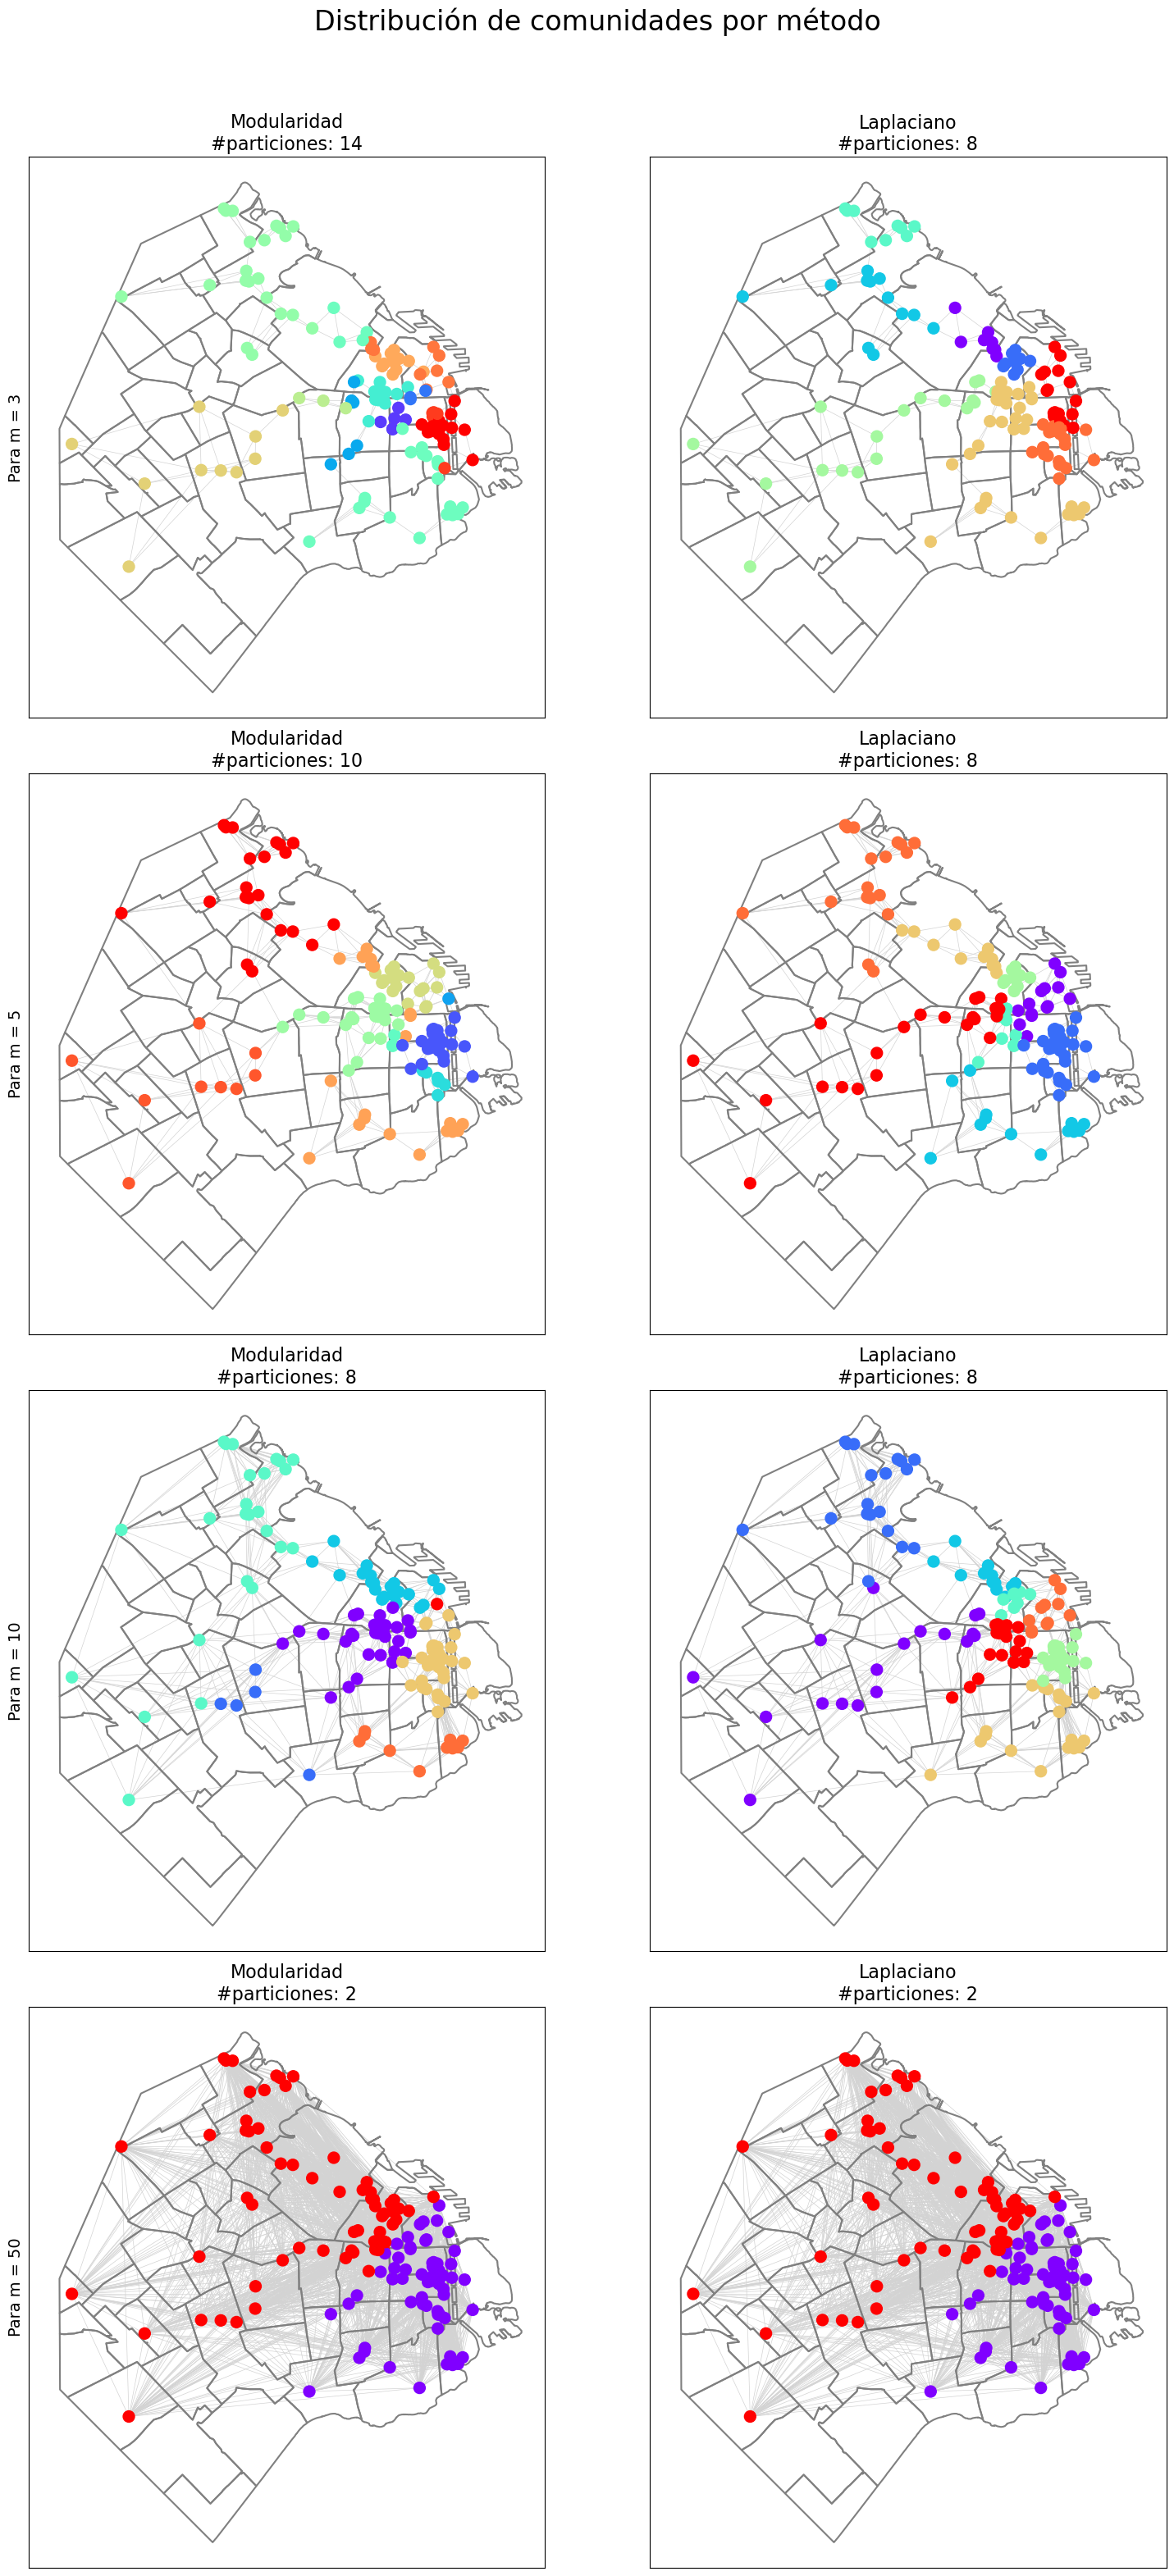

In [465]:
fig, axes = plt.subplots(len(A_m), 2, figsize=(16, 8 * len(A_m)))

# Asegurarse de que axes es 2D incluso si len(A_m) == 1
if len(A_m) == 1:
    axes = np.array([axes])

G_layout = {
    i: v for i, v in enumerate(
        zip(
            museos.to_crs("EPSG:22184").get_coordinates()['x'],
            museos.to_crs("EPSG:22184").get_coordinates()['y']
        )
    )
}

for i, (A, m) in enumerate(A_m):
    particiones_modularidad = particiones_museos_modularidad[i]
    particiones_laplaciano = particiones_museos_laplaciano[i]

    # Colores para cada partición
    colores_modularidad = cm.rainbow(np.linspace(0, 1, len(particiones_modularidad)))
    colores_laplaciano = cm.rainbow(np.linspace(0, 1, len(particiones_laplaciano)))

    colores_museos_modularidad = {
        museo: colores_modularidad[j]
        for j, particion in enumerate(particiones_modularidad)
        for museo in particion
    }
    colores_museos_laplaciano = {
        museo: colores_laplaciano[j]
        for j, particion in enumerate(particiones_laplaciano)
        for museo in particion
    }

    G = nx.from_numpy_array(A)

    # Subplot para modularidad (izquierda)
    ax_mod = axes[i, 0]
    barrios.to_crs("EPSG:22184").boundary.plot(color='gray', ax=ax_mod)
    ax_mod.set_title(f"Modularidad\n#particiones: {len(particiones_modularidad)}", fontsize=16)
    colores_de_museos_modularidad = [colores_museos_modularidad[museo] for museo in G.nodes()]
    nx.draw_networkx(
        G,
        G_layout,
        node_color=colores_de_museos_modularidad,
        ax=ax_mod,
        with_labels=False,
        node_size=100,
        edge_color='lightgray',
        width=0.5
    )

    # Subplot para laplaciano (derecha)
    ax_lap = axes[i, 1]
    barrios.to_crs("EPSG:22184").boundary.plot(color='gray', ax=ax_lap)
    ax_lap.set_title(f"Laplaciano\n#particiones: {len(particiones_laplaciano)}", fontsize=16)
    colores_de_museos_laplaciano = [colores_museos_laplaciano[museo] for museo in G.nodes()]
    nx.draw_networkx(
        G,
        G_layout,
        node_color=colores_de_museos_laplaciano,
        ax=ax_lap,
        with_labels=False,
        node_size=100,
        edge_color='lightgray',
        width=0.5
    )

    # Etiqueta al costado de la fila
    ax_mod.set_ylabel(f"Para m = {m}", fontsize=14)

fig.suptitle('Distribución de comunidades por método', fontsize=24)
fig.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


<font color='greeb'>Nico: Ok, lindos.</font>

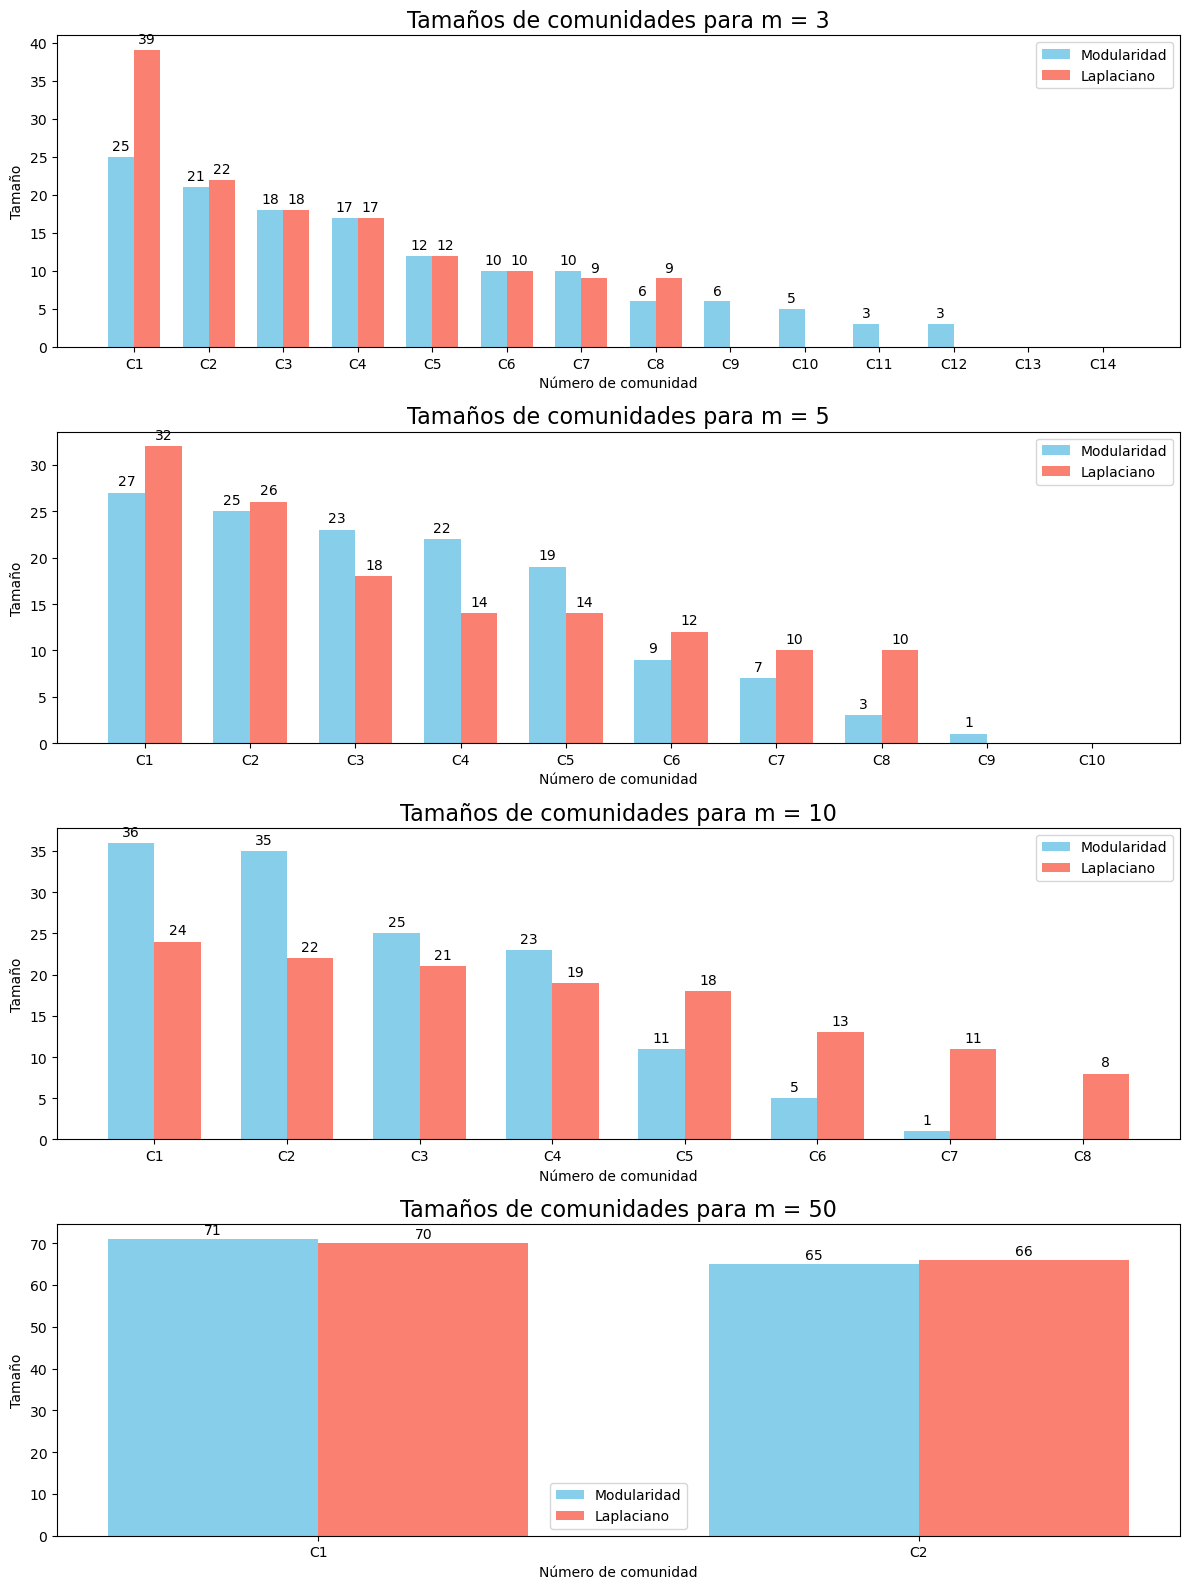

In [466]:
valores_m = [m for _, m in A_m]

fig, axes = plt.subplots(len(valores_m), 1, figsize=(12, 4 * len(valores_m)))

if len(valores_m) == 1:
    axes = [axes]

for idx, m in enumerate(valores_m):
    ax = axes[idx]

    # Ordenamos para que la compuaración sea correcta.
    tamaños_modularidad = sorted([len(c) for c in particiones_museos_modularidad[idx]], reverse=True)
    tamaños_laplaciano = sorted([len(c) for c in particiones_museos_laplaciano[idx]], reverse=True)

    max_comunidades = max(len(tamaños_modularidad), len(tamaños_laplaciano))
    x = np.arange(max_comunidades)

    # Rellenar con ceros para igualar longitud
    tamaños_modularidad += [0] * (max_comunidades - len(tamaños_modularidad))
    tamaños_laplaciano += [0] * (max_comunidades - len(tamaños_laplaciano))

    width = 0.35

    bars1 = ax.bar(x - width/2, tamaños_modularidad, width, label='Modularidad', color='skyblue')
    bars2 = ax.bar(x + width/2, tamaños_laplaciano, width, label='Laplaciano', color='salmon')

    for bar in bars1:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width() / 2, height + 0.5, str(int(height)),
                    ha='center', va='bottom', fontsize=10)

    for bar in bars2:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width() / 2, height + 0.5, str(int(height)),
                    ha='center', va='bottom', fontsize=10)

    ax.set_title(f'Tamaños de comunidades para m = {m}', fontsize=16)
    ax.set_xlabel('Número de comunidad')
    ax.set_ylabel('Tamaño')
    ax.set_xticks(x)
    ax.set_xticklabels([f'C{i+1}' for i in x])
    ax.legend()

plt.tight_layout()
plt.show()


<font color='orange'>Nico: Recuerden referenciar todas las figuras en la discusión. El gráfico anterior está bueno para decir cosas pero no parecen hacer énfasis directo en lo siguiente.</font>

Una observación importante, evidente en el gráfico de barras comparativo, es que a medida que aumenta $m$, la red tiende a dividirse en menos comunidades, pero de mayor tamaño. Esta tendencia tiene una explicación bastante intuitiva: si pensamos la red de museos como un mapa de amistades en una ciudad (sí, vamos a usar el mismo ejemplo que Ari en clase porque ya es un clásico), cuando $m$ es pequeño (por ejemplo, $m = 3$), cada museo solo se “conecta” con sus 3 vecinos más cercanos. Esto genera comunidades pequeñas y bastante localizadas, como si cada barrio tuviera su propio círculo social cerrado. En el gráfico de barras puede verse cómo para $m = 3$, ambos métodos (modularidad y laplaciano) detectan muchas comunidades (alrededor de 10), con tamaños bastante desiguales.

A medida que incrementamos $m$, cada museo va incluyendo más conexiones en su "círculo de conocidos". Esto introduce enlaces que funcionan como puentes entre comunidades antes aisladas, lo que lleva a que se fusionen progresivamente. Por ejemplo, para $m = 5$ y $m = 10$, ya se observan comunidades más grandes y en menor cantidad. Esta transición es clara en el gráfico, donde los bloques de color (representando cada comunidad) se hacen menos numerosos y más altos a medida que aumenta $m$.

Cuando llegamos a $m = 50$, la red está tan densamente conectada que ambos métodos identifican solamente dos comunidades principales, con tamaños similares (\~71 y \~65-66 museos). Además, se observa que modularidad y laplaciano coinciden bastante en cómo separan la red. Esto sugiere que, al alcanzar cierto nivel de conectividad, ambos métodos pueden llegar a converger en una partición similar, posiblemente cercana a una configuración estructuralmente "óptima" de la red.

Ahora bien, esta convergencia ocurre solo cuando la red está bien conectada. Para valores chicos de $m$, los métodos dan resultados claramente distintos (como se ve en los primeros tres paneles del gráfico), y eso tiene sentido si consideramos sus fundamentos:

* **Laplaciano**: este método se basa en encontrar cortes que minimicen la cantidad de aristas entre comunidades (lo que se conoce como *corte mínimo*). En redes poco densas, tiende a generar particiones más específicas, separando comunidades pequeñas que están relativamente aisladas. Por ejemplo, para $m = 3$, el laplaciano encuentra una comunidad de tamaño 39, mucho más grande que la que detecta modularidad en ese mismo caso.

* **Modularidad**: este método busca maximizar la densidad de conexiones internas dentro de una comunidad en comparación con lo que se esperaría por azar, dados los grados de los nodos. Esto lo lleva a detectar grupos que están más densamente interconectados, aunque no necesariamente aislados por pocos enlaces.

<font color='green'>Nico: De acuerdo con sus observaciones!</font>

<font color='orange'>Nico: Faltaría analizar la estabilidad de los métodos ante realizaciones (seeds). Como les decía antes, para entender mejor esto sirve mirar la red de ejemplo primero y relacionar los resultados (estables o no) con el funcionamiento del método de la potencia. </font>

Nos proponemos analizar la estabilidad de los métodos frente a diferentes valores de seed. Para ello, utilizaremos $30$ seeds, correspondientes a los valores enteros del $0$ al $29$.
La estabilidad será evaluada de acuerdo con los siguientes criterios:
- Para el método basado en el **Laplaciano**: se analizará el tamaño de las $n$ comunidades generadas utilizando $k$ niveles (parámetro).
- Para el método basado en la **modularidad**: se considerará la cantidad de comunidades generadas.


Para m = 3:
  Seed 0:
    Partición: [[1, 26, 28, 29, 49, 50, 52, 53, 55, 57, 82, 85], [8, 19, 27, 30, 77, 79, 80, 84, 113], [6, 17, 25, 42, 87, 88, 89, 126, 130, 131], [3, 4, 11, 22, 24, 34, 39, 65, 86], [0, 9, 10, 12, 18, 21, 32, 35, 40, 47, 48, 59, 61, 63, 66, 78, 98, 107, 115, 118, 135], [2, 5, 13, 14, 15, 16, 23, 38, 43, 56, 83, 105, 116, 123, 124, 128, 129, 133], [7, 31, 41, 45, 46, 51, 54, 58, 62, 64, 68, 69, 70, 71, 72, 73, 74, 75, 90, 92, 93, 94, 97, 99, 100, 101, 102, 106, 109, 111, 112, 114, 117, 119, 120, 121, 125, 127, 132], [20, 33, 36, 37, 44, 60, 67, 76, 81, 91, 95, 96, 103, 104, 108, 110, 122, 134]]
    Tamaño de comunidades: [12, 9, 10, 9, 21, 18, 39, 18]

  Seed 1:
    Partición: [[7, 31, 41, 45, 46, 51, 54, 58, 62, 64, 68, 69, 70, 71, 72, 73, 74, 75, 90, 92, 93, 94, 97, 99, 100, 101, 102, 106, 109, 111, 112, 114, 117, 119, 120, 121, 125, 127, 132], [20, 33, 36, 37, 44, 60, 67, 76, 81, 91, 95, 96, 103, 104, 108, 110, 122, 134], [2, 5, 13, 14, 15, 16, 23, 38, 43, 56, 

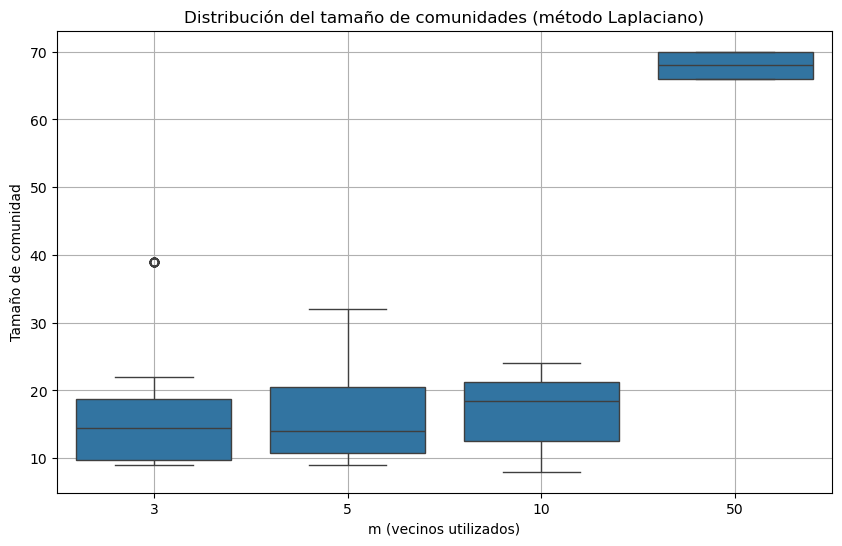

In [467]:
datos = []
for i, (A, m) in enumerate(A_m):
  nivel = niveles_laplaciano[i][0]
  print(f"Para m = {m}:")
  for seed in range(30):
    print(f"  Seed {seed}:")
    np.random.seed(seed)
    partición = laplaciano_iterativo_multiplicidad(A, nivel)
    # Guardar tamaño de cada comunidad
    for comunidad in partición:
        datos.append({
            'm': m,
            'seed': seed,
            'Tamaño comunidad': len(comunidad)
        })
    print(f"    Partición: {partición}")
    print(f"    Tamaño de comunidades: {[len(c) for c in partición]}")
    print()

df_laplaciano = pd.DataFrame(datos)

plt.figure(figsize=(10, 6))
sns.boxplot(x='m', y='Tamaño comunidad', data=df_laplaciano)
plt.title('Distribución del tamaño de comunidades (método Laplaciano)')
plt.xlabel('m (vecinos utilizados)')
plt.ylabel('Tamaño de comunidad')
plt.grid(True)
plt.show()


El gráfico resultante muestra cómo varía el tamaño de las comunidades detectadas por el método del Laplaciano cuando se ejecuta múltiples veces con distintas semillas, para diferentes valores de $m$. 

Lo más llamativo es que para valores bajos de $m$, como 3 y 5, hay una dispersión clara en los tamaños de comunidad: la varianza es alta e incluso tenemos algunos outliers que se encuentran fuera de los "whiskers" de las cajas en el caso de $m = 3$. Esto parecería indicar que, cuando la red es más dispersa y tiene menos conexiones por nodo, el método es más sensible a la elección de la semilla inicial. En esos casos, pequeñas variaciones aleatorias en el vector de inicio pueden llevar a converger hacia autovectores distintos, y por lo tanto, a particiones diferentes de la red. 

Esto no es sorprendente si se tiene en cuenta el análisis realizado en el [ejercicio 3](#analisis-laplaciano), donde observamos que la condición arbitraria del corte parecía causar que la elección de semilla afecte al resultado.

A medida que el valor de $m$ crece, esa variabilidad disminuye gradualmente: 
- Para $m=10$, aunque las cajas del boxplot son más angostas que en los casos anteriores (sugiriendo que comienza a estabilizarse en torno a ciertos valores consistentes), todavía se observa cierta variabilidad en los tamaños de comunidad, dando a entender que el método aún no ha alcanzado completa estabilidad.
- Cuando $m=50$, prácticamente todas las ejecuciones devuelven particiones con tamaños idénticos o casi idénticos. 

Se puede inferir que solo en redes suficientemente densas el método del Laplaciano se vuelve verdaderamente estable, lo cual es consistente con las observaciones que venimos haciendo en este trabajo.

Este experimento deja en evidencia que la elección de la semilla no es un detalle menor: en redes poco o moderadamente conectadas, puede influir fuertemente en el resultado final. En cambio, para grafos densos, el método tiende a converger a una única solución, haciendo menos relevante la inicialización.

Ahora, yendo a nuestra hipótesis inicial sobre que la estabilidad del método dependía meramente de la multiplicidad del autovector obtenido por el método de la potencia utilizado en el método, no es completamente certera. Se pueden observar en los prints de arriba que para algunas seeds la multilicidad da $\gt 1$, mientras que para otras da $1$. Esto nos permite inferir que hay otros factores ajenos que podríamos estar pasando por alto.

Para m = 3:
  Seed 0:
  El autovalor máximo en módulo de Rp tiene multiplicidad mayor a uno
    Partición: [[33, 46, 51, 67, 68, 83, 91, 114, 120], [58, 70, 71, 73, 74, 121], [7, 41, 44, 64, 69, 72, 75, 90, 92, 93, 94, 106, 110, 111, 117, 125, 132], [], [2, 16, 115, 116, 128], [0, 5, 10, 12, 13, 14, 15, 18, 40, 59, 61, 78, 98, 107, 118, 123, 124, 135], [6, 17, 23, 24, 25, 42, 87, 88, 89, 126, 130, 131], [], [11, 34, 65, 86], [38, 43, 56, 105, 129, 133], [3, 4, 9, 21, 22, 31, 32, 35, 39, 45, 47, 48, 54, 62, 63, 66, 97, 99, 100, 101, 102, 109, 112, 119, 127], [1, 8, 19, 26, 27, 28, 29, 30, 49, 50, 52, 53, 55, 57, 77, 79, 80, 82, 84, 85, 113], [95, 96, 103], [20, 36, 37, 60, 76, 81, 104, 108, 122, 134]]
    Cantidad de comunidades: 14

  Seed 1:
    Partición: [[2, 16, 115, 116, 128], [0, 5, 10, 12, 13, 14, 15, 18, 40, 59, 61, 78, 98, 107, 118, 123, 124, 135], [95, 96, 103], [20, 36, 37, 60, 76, 81, 104, 108, 122, 134], [3, 4, 9, 21, 22, 31, 32, 35, 39, 45, 47, 48, 54, 62, 63, 66, 97, 99,

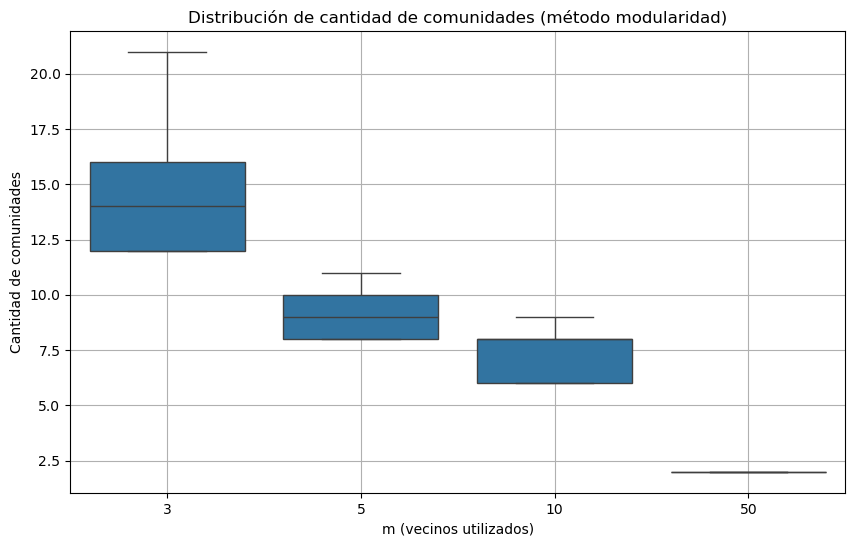

In [468]:
datos = []
for i, (A, m) in enumerate(A_m):
  print(f"Para m = {m}:")
  for seed in range(30):
    print(f"  Seed {seed}:")
    np.random.seed(seed)
    partición = modularidad_iterativo_multiplicidad(A)
    datos.append({
        'm': m,
        'seed': seed,
        'Cantidad de comunidades': len(partición)
    })
    print(f"    Partición: {partición}")
    print(f"    Cantidad de comunidades: {len(partición)}")
    print()


df_modularidad = pd.DataFrame(datos)

plt.figure(figsize=(10, 6))
sns.boxplot(x='m', y='Cantidad de comunidades', data=df_modularidad)
plt.title('Distribución de cantidad de comunidades (método modularidad)')
plt.xlabel('m (vecinos utilizados)')
plt.ylabel('Cantidad de comunidades')
plt.grid(True)
plt.show()

Muy similar al anterior, podemos notar una alta variabilidad en la cantidad de comunas para los $m$ chicos, tendiendo a una cierta estabilidad para los $m$ grandes. Es importante remarcar que, si en el método de la potencia utilizamos `.rand` que genere entre $0$ y $1$, el método es totalmente estable para esta heurística, mientras que si `.rand` genera entre $-1$ y $1$, obtenemos este resultado.

Ahora, el análisis es similar al que hicimos con el Laplaciano. Con la matriz $A$ del ejemplo habíamos notado una estabilidad total con el método, y habíamos visto que el autovalor relacionado con el método de la potencia utilizado en el método de modularidad tenía multiplicidad $1$, por lo que habíamos inferido que, quizás, había una relación muy estrecha entre la multiplicidad y la estabilidad de los métodos.  
En el análisis del Laplaciano para este ejercicio (punto 4) notamos que no es necesariamente cierto para ese método. Ahora podemos inferir lo mismo acá. Si se ven los prints se puede notar que algunas tiradas dan multiplicidad $\ge 1$, pero la mayoría dan $= 1$, y tenemos una alta variabilidad en las tiradas chicas. Esto quiere decir que evidentemente hay variables que se nos están escapando en nuestro análisis para hablar de la estabilidad del método. Mientras que la multiplicidad puede e infiere, no es la única métrica a tener en cuenta para justificar la estabiliad (o no estabilidad) de los métodos bajo estas heurísticas.

## Ejercicio 5
A lo largo de ambos trabajos practicos analizamos la red de los museos de CABA y su comportamiento durante la Noche de los Museos.

En el TP1 analizamos la navegación entre museos con un proceso estocástico, representando las decisiones de los visitantes como transiciones probabilísticas entre nodos de un grafo. De esta manera, pudimos observar qué museos y regiones eran más relevantes, en el sentido de qué cantidad de visitantes  se encuentren en los mismos a lo largo de la noche.

En este contexto consideramos cómo la cantidad de conexiones de la red ($m$) afectaba al comportamiento de los visitantes en este modelo, identificando cómo el aumento del mismo aumentaba la relevancia de las zonas más concentradas del mapa. Por otro lado, también consideramos cómo el parámetro $\alpha$, que representaba el comportamiento aleatorio de los visitantes (en el sentido de qué museo elijen visitar en el siguiente instante) también afectaba la relevancia de los museos, identificando que un aumento del mismo causaba que los museos más aislados no pierdan tanta relevancia con respecto a aquellos en zonas más concentradas.


Por otro lado, en el TP2 analizamos la estructura de la red de museos mediante el análisis espectral. Usamos métodos basados en modularidad y cortes mínimos, para identificar comunidades, es decir, subconjuntos de museos fuertemente conectados entre sí de acuerdo a ciertos criterios.

Gracias a los resultados obtenidos pudimos observar que el parámetro $m$, medida que aumenta, causa que la red se vuelva más densa, lo que reduce la cantidad de comunidades detectadas y aumenta su tamaño promedio. Pudimos ver que este comportamiento es consistente para ambos métodos cuando el mismo es suficientemente grande, pero con algunas diferencias en los valores más bajos de $m$.

Observamos también cómo el parámetro $m$ fue relevante en el análisis que hicimos en ámbos trabajos prácticos, aunque el impacto se manifestaba de manera distinta, ya que al analizar la relevancia y centralidad de los museos vimos como el aumento del mismo llevaba a altas concentraciones de visitantes en las zonas de museos más concentradas, mientras que en la detección de comunidades el aumento va llevando a una uniformidad de las comunidades, como analizamos en el ejercicio 4.

<font color='green'>Nico: Buena observación, mirando el impacto de este parámetro en ambos métodos.</font>


En ambos trabajos prácticos pudimos analizar de manera diferente las redes y conexiones utilizando diferentes herramientas y métodos (PageRank, modularidad, cortes mínimos). Estos métodos nos permitieron poder separarnos de conceptos que solo conocíamos de manera abstracta como por ejemplo los autovalores y autovectores, y entender cómo pueden ser utilizados como elementos centrales en la detección de comunidades y la medición de centralidad. 
Además, pudimos hacer uso del método de resolución LU en ambos TPs para lograr un cálculo eficiente de triangulación de matrices para poder lograr implementar la metodología respectiva.

En el primer TP como hacer la inversa es demasiado costosa, para poder realizar el cálculo del PageRank de los museos usamos el método LU para obtener las matrices $L$ y $U$ y luego usarlas para resolver las siguentes ecuaciones lineales (específicamente usado tanto para calcular el vector $P$ del page rank como para descomponer a la matriz $B$ y poder calcular la estimación de visitas iniciales $v$ a partir del total $w$):
- $Ly=b$.
- $Ux=y$.

Mientras que en el segundo TP la misma fue utlizada para poder obtener los autovalores más chicos de una matriz shifteada usando su inversa.

<font color='orange'>Nico: Sí, faltaría mencionar los métodos de resolución directa de ecuaciones lineles, como LU del tp1.</font>


El uso de herramientas como Python, junto a las librerías NetworkX, GeoPandas y Matplotlib, fue clave para construir gráficos que nos permitieron visualizar e interpretar de manera eficiente los datos obtenidos. A su vez, observamos que estas metodologías pueden aplicarse otros contextos donde se buscque analizar la conectividad y las relaciones estructurales en redes representadas mediante grafos.